In [17]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt

In [18]:
train_set = torchvision.datasets.MNIST(
    root='../MNIST-data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [19]:
len(train_set)

60000

In [20]:
train_set.train_labels

tensor([5, 0, 4,  ..., 5, 6, 8])

In [21]:
train_set.train_labels.bincount()

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [22]:
print(train_set.train_data.shape)

torch.Size([60000, 28, 28])


In [46]:
train_set_image_individual = [train_set.train_data[train_set.train_labels==i].unsqueeze(dim=1) for i in range(10)]

In [47]:
train_set_label_individual = [train_set.train_labels[train_set.train_labels==i] for i in range(10)]

In [48]:
class MNIST_individual(data.Dataset):
    def __init__(self, data, label):
        
        self.data = data
        self.label = label

    def __getitem__(self, index):
        
        img, target = self.data[index], self.label[index]
        return img, target

    def __len__(self):
        return len(self.data)

In [49]:
train_set_individual = [MNIST_individual(train_set_image_individual[i], train_set_label_individual[i]) for i in range(10)]

In [50]:
train_loader_individual = [torch.utils.data.DataLoader(
    train_set_individual[i],
    batch_size=10,
    shuffle=True) for i in range(10)]

In [51]:
sample = next(iter(train_loader_individual[0]))

In [52]:
images, labels = sample

In [53]:
print(images.shape)

torch.Size([10, 1, 28, 28])


In [54]:
print(labels.shape)

torch.Size([10])


labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


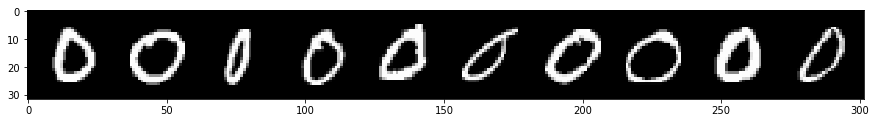

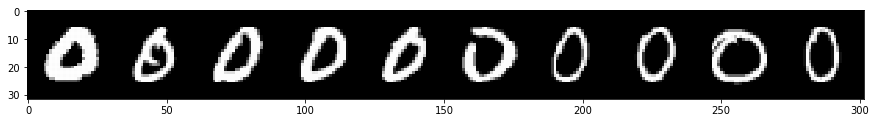

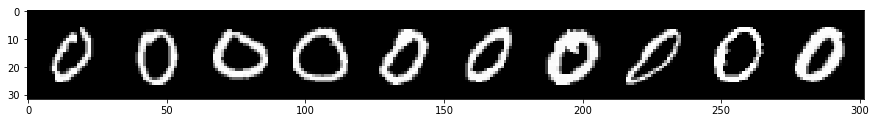

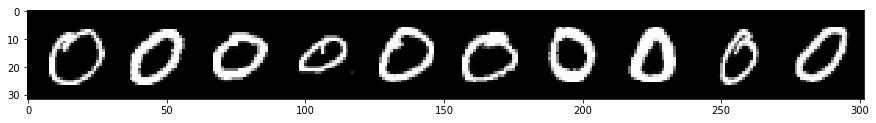

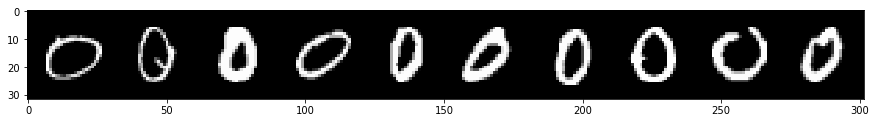

In [55]:
for i in range(5):
    sample = next(iter(train_loader_individual[0]))
    images, labels = sample
    grid = torchvision.utils.make_grid(images, nrow=10)
    plt.figure(i, figsize=(15,15))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels:', labels)

In [58]:
def generate_individual_set_loader(data_set):
    data_set_image_individual = [data_set.train_data[data_set.train_labels==i].unsqueeze(dim=1) for i in range(10)]
    data_set_label_individual = [data_set.train_labels[data_set.train_labels==i] for i in range(10)]
    
    data_set_individual = [MNIST_individual(data_set_image_individual[i], data_set_label_individual[i]) for i in range(10)]
    
    data_loader_individual = [torch.utils.data.DataLoader(
        data_set_individual[i],
        batch_size=10,
        shuffle=True) for i in range(10)]
    
    return data_set_individual, data_loader_individual

In [59]:
data_set_individual, data_loader_individual = generate_individual_set_loader(train_set)

labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


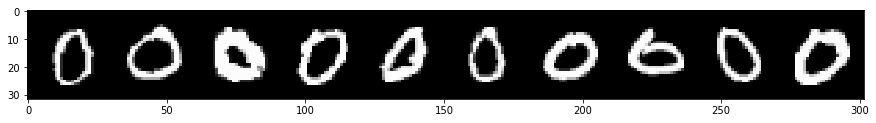

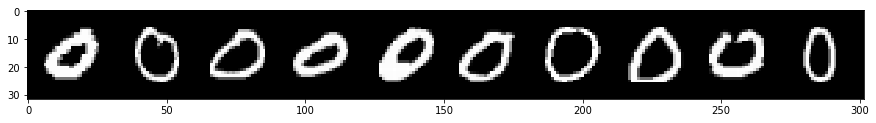

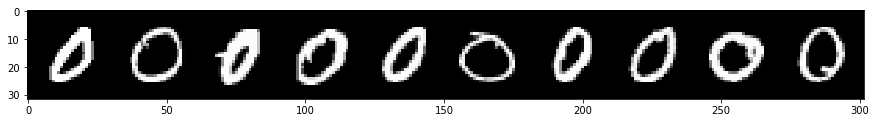

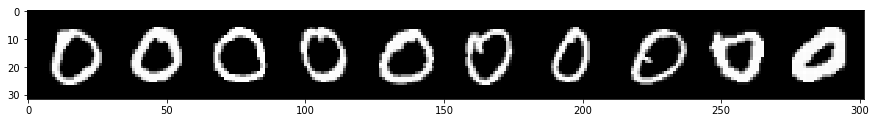

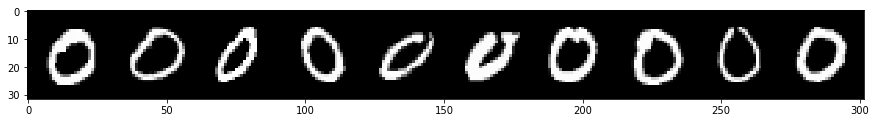

In [60]:
for i in range(5):
    sample = next(iter(data_loader_individual[0]))
    images, labels = sample
    grid = torchvision.utils.make_grid(images, nrow=10)
    plt.figure(i, figsize=(15,15))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels:', labels)